In [1]:
import numpy as np
import torch
from torch import nn
from scipy import sparse
import time
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.stats import zscore

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import env

In [4]:
Ninf_train = 50
N_train = 2000
T_train = 125
lam0_train = 10

Ninf_test = 500
N_test = 20000
T_test= 150
lam0_test = 100

In [7]:
lams = [100, 200, 300, 400, 500, 1000, 5000]

In [13]:
d = sio.loadmat('least_squares.mat')
a = d['a'].flatten()

In [14]:
numTrials = 1000
deaths = np.zeros((len(lams), numTrials))
deaths[0] = d['deaths']

for i, lam in enumerate(lams):
    if i == 0:
        continue
    t0 = time.time()
    for trial in range(numTrials):
        if trial % 100 == 0:
            print(trial)
        deaths[i, trial] = env.trialEnv(a, Ninf_test, N_test, T_test, lam)
    testtime = time.time() - t0
    print(testtime)
    print(lam, np.mean(deaths))

0
100
200
300
400
500
600
700
800
900
2644.6229016780853
200 32.258428571428574
0
100
200
300
400
500
600
700
800
900
2634.0491840839386
300 42.38742857142857
0
100
200
300
400
500
600
700
800
900
2689.771470308304
400 50.783142857142856
0
100
200
300
400
500
600
700
800
900
2550.3156406879425
500 58.177285714285716
0
100
200
300
400
500
600
700
800
900
2283.6683893203735
1000 63.555571428571426
0
100
200
300
400
500
600
700
800
900
2273.345005273819
5000 67.57185714285714


In [15]:
drandom = sio.loadmat('randomvacc.mat')

In [16]:
deathsrandom = np.zeros((len(lams), numTrials))

In [17]:
numTrials = 1000
deathsrandom[0] = drandom['deaths']

for i, lam in enumerate(lams):
    if i == 0:
        continue
    t0 = time.time()
    for trial in range(numTrials):
        if trial % 100 == 0:
            print(trial)
        deathsrandom[i, trial] = env.trialEnv(None, Ninf_test, N_test, T_test, lam)
    testtime = time.time() - t0
    print(testtime)
    print(lam, np.mean(deathsrandom[i]))

0
100
200
300
400
500
600
700
800
900
2200.7186081409454
200 168.57
0
100
200
300
400
500
600
700
800
900
2208.060700416565
300 134.944
0
100
200
300
400
500
600
700
800
900
2155.661907672882
400 110.027
0
100
200
300
400
500
600
700
800
900
2145.9728467464447
500 92.961
0
100
200
300
400
500
600
700
800
900
2130.521109342575
1000 56.454
0
100
200
300
400
500
600
700
800
900
2091.567728996277
5000 31.231


In [18]:
d2 = {}
d2['deaths'] = deaths
d2['deathsrandom'] = deathsrandom
d2['lams'] = lams

In [19]:
np.mean(deaths, axis=1)

array([134.213,  91.596,  70.903,  58.77 ,  51.759,  37.648,  28.114])

In [20]:
np.mean(deathsrandom, axis=1)

array([211.778, 168.57 , 134.944, 110.027,  92.961,  56.454,  31.231])

In [31]:
plt.rcParams.update({'font.size': 24})

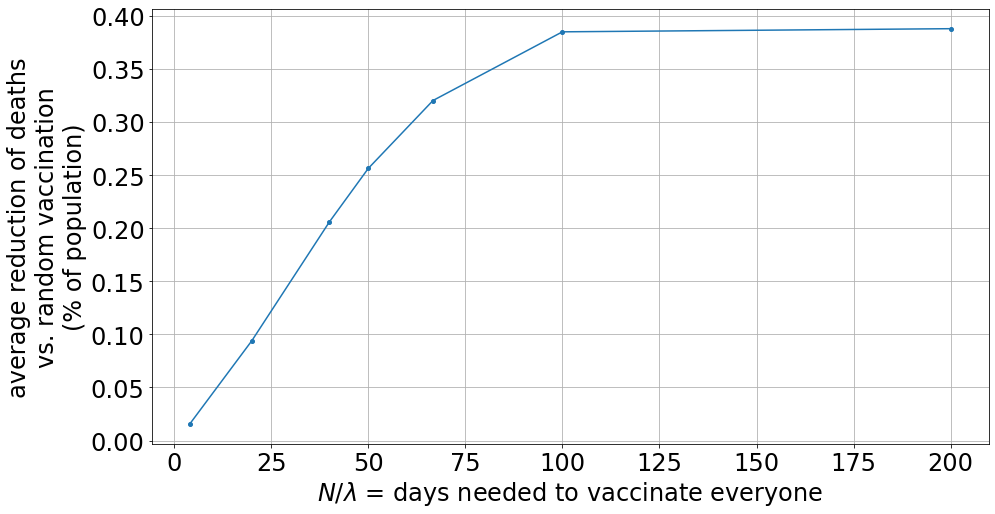

In [39]:
plt.figure(figsize=(15,8))
plt.plot(20000/np.array(lams), (np.mean(deathsrandom, axis=1) - np.mean(deaths, axis=1))/20000*100, '.-', ms=8)
plt.ylabel('average reduction of deaths\nvs. random vaccination\n(% of population)')
plt.xlabel('$N / \lambda$ = days needed to vaccinate everyone')
plt.grid()